## Importer les bibliothèques

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv("voice.csv")

### Encodage des étiquettes 

In [3]:
df['label'].replace(['male','female'],[0,1],inplace=True)
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,1
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,1
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,1
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,1


### Sélectionner les caractéristiques de voix et les étiquettes

In [4]:
Y=df['label']
X=df.drop('label',axis=1)

In [5]:
X

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


In [6]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3163    1
3164    1
3165    1
3166    1
3167    1
Name: label, Length: 3168, dtype: int64

# 

In [7]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler().fit(df)
df=Scaler.transform(df)

In [8]:
from sklearn.preprocessing import Normalizer
Scaler=Normalizer().fit(df)
df=Scaler.transform(df)

In [9]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
df=Scaler.fit_transform(df)
df

array([[0.05005145, 0.51683487, 0.11798644, ..., 0.28333937, 0.30909652,
        0.44867888],
       [0.11073927, 0.52921264, 0.17160419, ..., 0.29405267, 0.34232198,
        0.45559132],
       [0.19572825, 0.59677095, 0.20716755, ..., 0.30634462, 0.3468552 ,
        0.46497703],
       ...,
       [0.24182661, 0.87279042, 0.51815216, ..., 0.31138062, 0.42197722,
        0.68878439],
       [0.20105027, 0.88702835, 0.52365616, ..., 0.32800886, 0.56228425,
        0.71929005],
       [0.4005203 , 0.87367639, 0.51370632, ..., 0.19086971, 0.58865974,
        0.70185638]])

 ### Diviser les données en ensembles d'entraînement et de test

In [10]:

(X_train, X_test, y_train, y_test) = train_test_split(X, Y, test_size=0.3, random_state=25)
print("train_set: ",X_train.shape)
print("test_set: ",X_test.shape)

train_set:  (2217, 20)
test_set:  (951, 20)


## 1- Algorithme KNN (K-Nearest Neighbors)

In [11]:
model = KNeighborsClassifier()
model.fit(X,Y)
model.score(X,Y)

0.8153409090909091

In [16]:
# Normaliser les caractéristiques de voix
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN Accuracy: 0.9747634069400631
Confusion matrix:
 [[453   5]
 [ 19 474]]


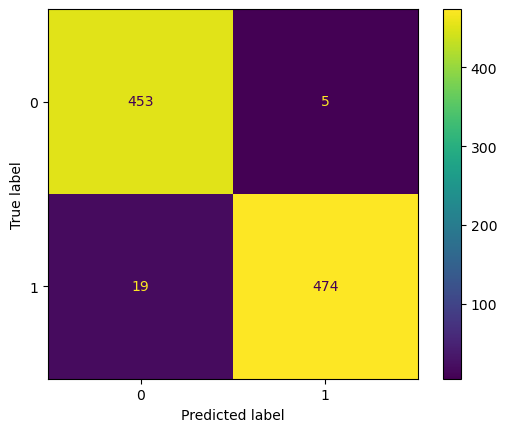

In [19]:
# Créer un classifieur KNN
knn = KNeighborsClassifier(n_neighbors=9)
# Entraîner le classifieur
knn.fit(X_train, y_train)
# Faire des prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)
# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('KNN Accuracy:', accuracy)
print('Confusion matrix:\n', cm)

metrics.ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.show()

## valeur optimale des hyper parametres

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}
model = KNeighborsClassifier()

knn_cv = GridSearchCV(model, knn_param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print("meilleurs parametres : ", knn_cv.best_params_)
print ("Meilleure config: ", knn_cv.best_estimator_)

meilleurs parametres :  {'n_neighbors': 5}
Meilleure config:  KNeighborsClassifier()


# 2-Regression logistique 

Accuracy: 96.74027339642481 %
Confusion matrix:
 [[449   9]
 [ 22 471]]


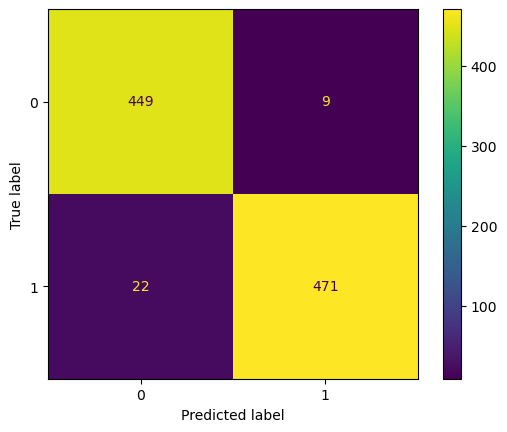

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,  f1_score, confusion_matrix

scaler = StandardScaler().fit(X_train)
X_train =scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = 100*accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy ,"%")
print('Confusion matrix:\n', cm)
metrics.ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.show()

### valeur optimale des hyper parametres

In [21]:
# define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['liblinear', 'saga']}
# initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
# fit the grid search to the training data
grid_search.fit(X_train, y_train)
# print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


Best hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best accuracy score:  0.9751876029528399


# SVM

In [23]:
from sklearn.svm import SVC
# Créer un classifieur SVM
svm = SVC(kernel='linear', C=1, random_state=42)

# Entraîner le classifieur
svm.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = svm.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Machine Accuracy:", accuracy)

Support Vector Machine Accuracy: 0.9674027339642481


In [24]:
# Définir la grille des hyperparamètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Créer le classifieur SVM
svm = SVC()

# Créer un objet GridSearchCV pour tester les différentes combinaisons d'hyperparamètres
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, n_jobs=-1)

# Faire tourner la recherche de la meilleure combinaison d'hyperparamètres
grid_search.fit(X_train, y_train)

# Récupérer les meilleurs hyperparamètres et la précision associée
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("SVM Best Parameters:", best_params)
print("SVM Best Accuracy:", best_score)

SVM Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best Accuracy: 0.9797022756390703
